In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('/content/TPS IN.xlsx')
df = df.iloc[104:]
print(df)

         DATES   TPS_GY  TPS_VOIX  TPS_DATA   TPS_GX
104 2022-12-14  2939.48    593.61  10293.88  7416.85
105 2022-12-15  2963.10    601.67  10429.38  7523.46
106 2022-12-16  2919.67    583.72  10353.44  7435.48
107 2022-12-17  2924.40    543.68  10399.56  7483.73
108 2022-12-18  2836.51    515.99  10195.47  7358.62
..         ...      ...       ...       ...      ...
360 2023-08-27  3148.25    548.00  11994.57  8846.14
361 2023-08-28  3305.87    609.99  11666.41  8405.65
362 2023-08-29  3361.10    612.92  11633.87  8323.49
363 2023-08-30  3256.79    601.13  11401.80  8239.63
364 2023-08-31  3310.27    599.33  11511.52  8244.07

[261 rows x 5 columns]


In [3]:
voix = df[['DATES','TPS_VOIX']]
voix.dropna(inplace= True)

<ipython-input-3-f563e517b4b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voix.dropna(inplace= True)


Text(0, 0.5, 'TPS_VOIX')

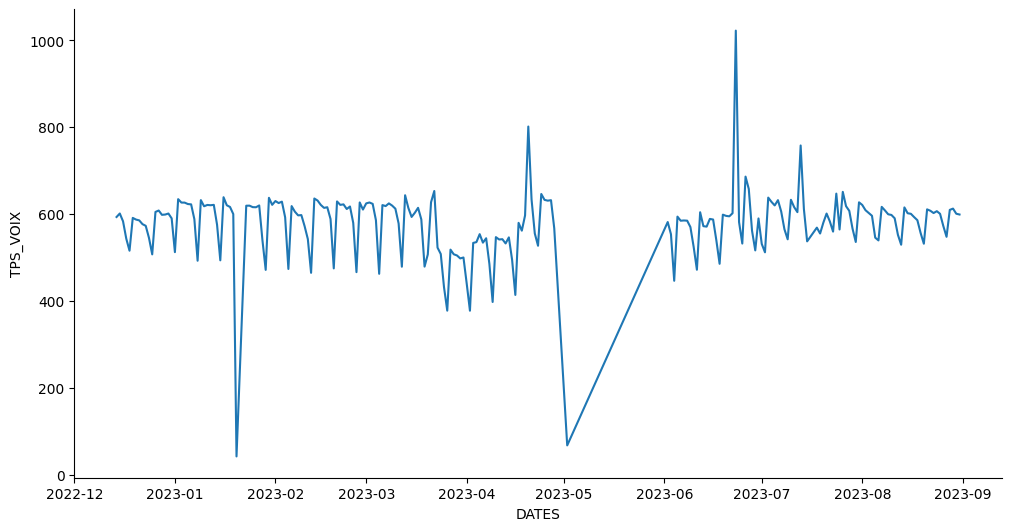

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  xs = series['DATES']
  ys = series['TPS_VOIX']

  plt.plot(xs, ys, label=series_name)

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = voix.sort_values('DATES', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DATES')
plt.ylabel('TPS_VOIX')

In [5]:
train_percentage = 0.8
train_size = int(len(voix) * train_percentage)
train_voix = voix.iloc[:train_size]
test_voix = voix.iloc[train_size:]

In [6]:
!pip install nixtlats
from nixtlats import TimeGPT

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00


In [7]:
timegpt = TimeGPT(
    # defaults to os.environ.get("TIMEGPT_TOKEN")
    token = 'F3fj6q9rwkFYv3NYKJyEmtTOjyQBj2yZT7mmqnB7IQcPmWhnBgSIh51NtZFoQosJYi5Sq3JZhoewvLUizm6GOnsbOzJXP0dQX8CkRV7gpztBnsySCOcgyD50V4XqiFZ5sGiEzqJlJHhSdjCUKWze9qxYwznBkVLUhH9c58s5BsY7SNxhlinjl6ex0LoDdMQAC2JnftufGn3BegGRtswujalK6OBRKok66TKZBnrPEvVj40Mg7UXqZIEwNF1v8rn6'
)

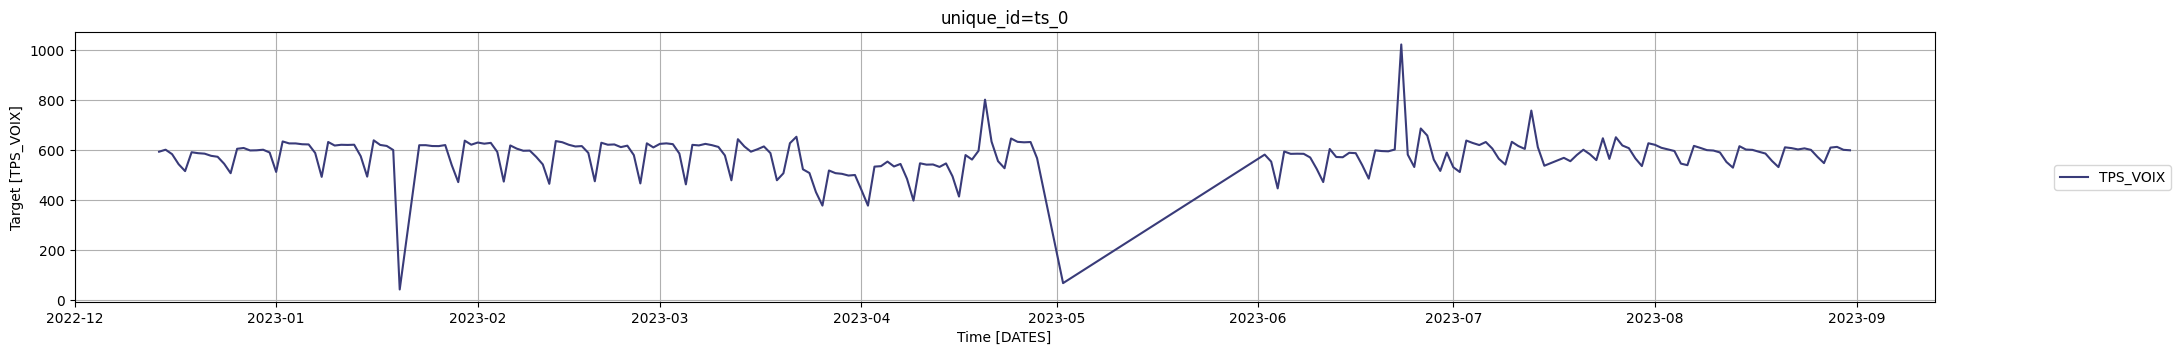

In [8]:
timegpt.plot(voix, time_col='DATES', target_col='TPS_VOIX')

In [11]:
timegpt_fcst_df = timegpt.forecast(df=voix, h=200, level = [80,90] , freq='D', time_col='DATES', target_col='TPS_VOIX',finetune_steps = 20,clean_ex_first = True)
timegpt_fcst_df

,DATES,TimeGPT,TimeGPT-lo-90,TimeGPT-lo-80,TimeGPT-hi-80,TimeGPT-hi-90
0,2023-09-01,597.968811,539.951724,557.727413,638.210209,655.985898
1,2023-09-02,553.796936,486.653843,504.881121,602.712751,620.940029
2,2023-09-03,544.322327,414.718700,437.867854,650.776799,673.925953
3,2023-09-04,608.003296,519.576806,551.461036,664.545556,696.429785
4,2023-09-05,607.144531,542.475648,574.535117,639.753945,671.813415
...,...,...,...,...,...,...
195,2024-03-14,588.576416,490.136317,518.600680,658.552152,687.016516
196,2024-03-15,588.352966,530.335879,548.111569,628.594364,646.370054
197,2024-03-16,565.335510,498.192417,516.419695,614.251326,632.478604
198,2024-03-17,563.274170,433.670543,456.819697,669.728643,692.877797


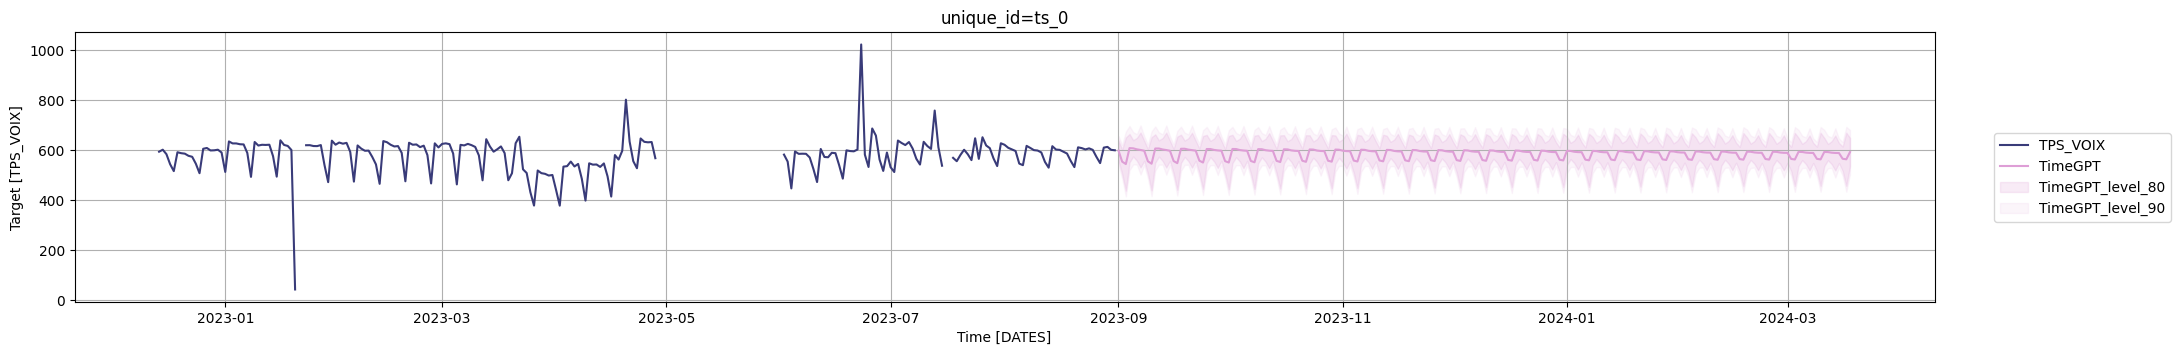

In [12]:
timegpt.plot(df, timegpt_fcst_df, time_col='DATES', target_col='TPS_VOIX',level = [80,90] )

In [13]:
timegpt_cv_df = timegpt.cross_validation(
    voix,
    h=7,
    n_windows=5,
    time_col='DATES',
    target_col='TPS_VOIX',
    freq='D',
    level=[80, 90],
    date_features=['month'],
)
timegpt_cv_df.head()

,DATES,cutoff,TPS_VOIX,TimeGPT,TimeGPT-lo-90,TimeGPT-lo-80,TimeGPT-hi-80,TimeGPT-hi-90
0,2023-07-28,2023-07-27,607.71,601.412673,539.170230,554.284817,648.540530,663.655117
1,2023-07-29,2023-07-27,566.86,560.995410,480.979140,510.285608,611.705213,641.011680
2,2023-07-30,2023-07-27,536.16,566.256820,435.019818,451.182964,681.330676,697.493822
3,2023-07-31,2023-07-27,627.39,617.474235,522.009933,550.939338,684.009132,712.938537
4,2023-08-01,2023-07-27,621.32,490.379003,417.312474,451.669157,529.088849,563.445533


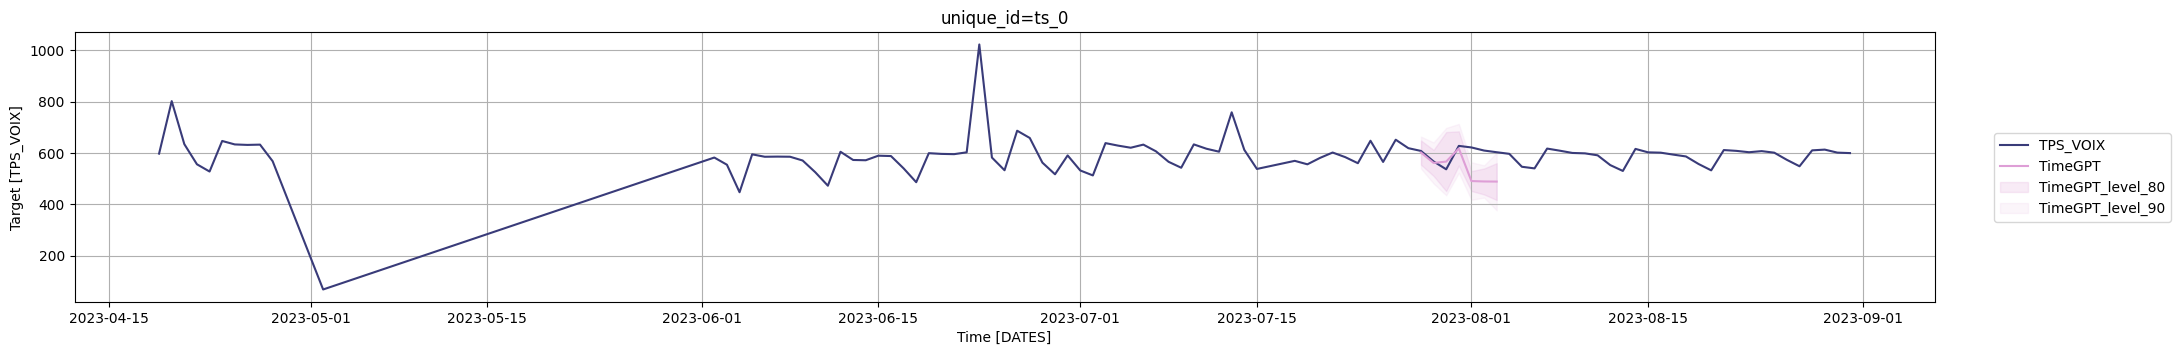

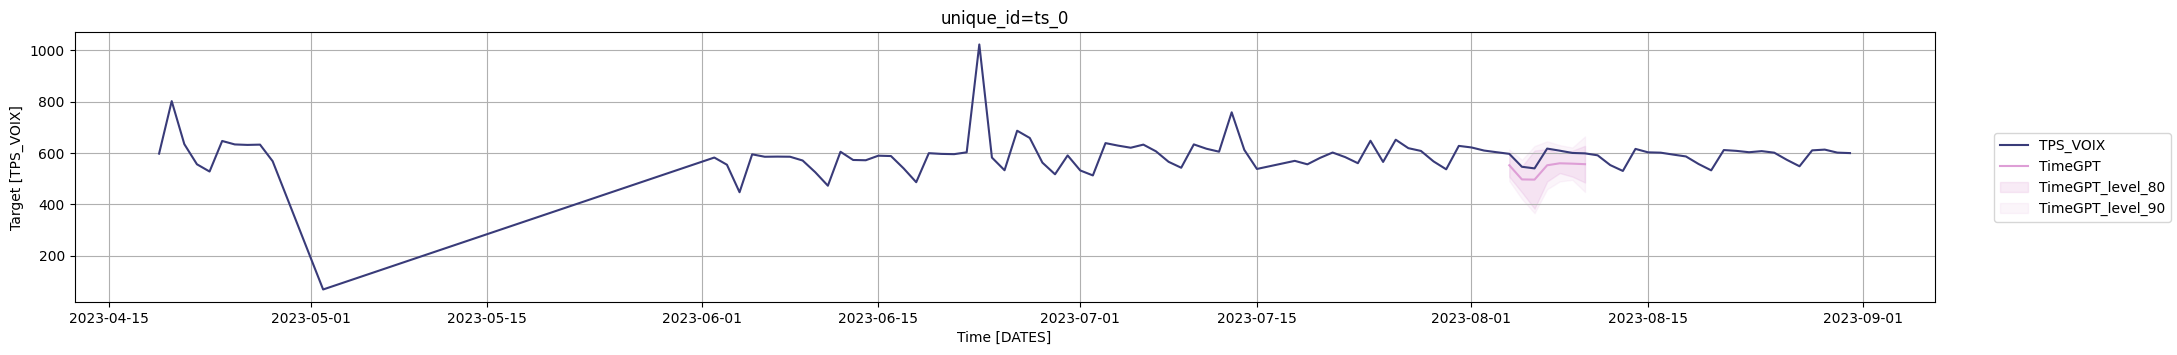

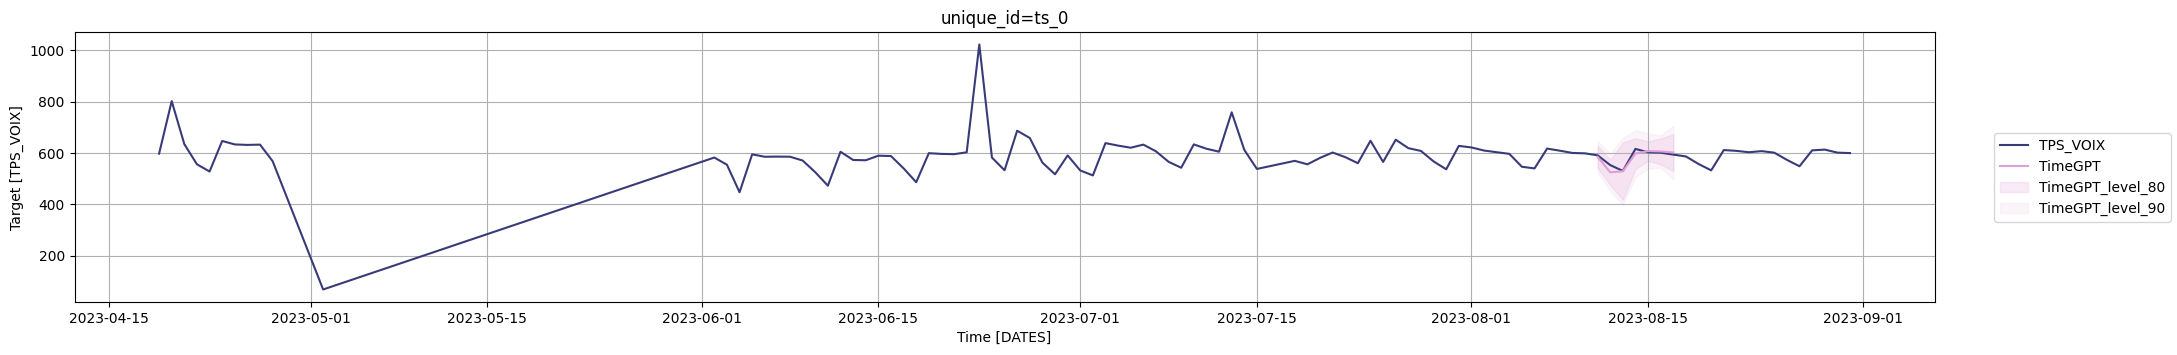

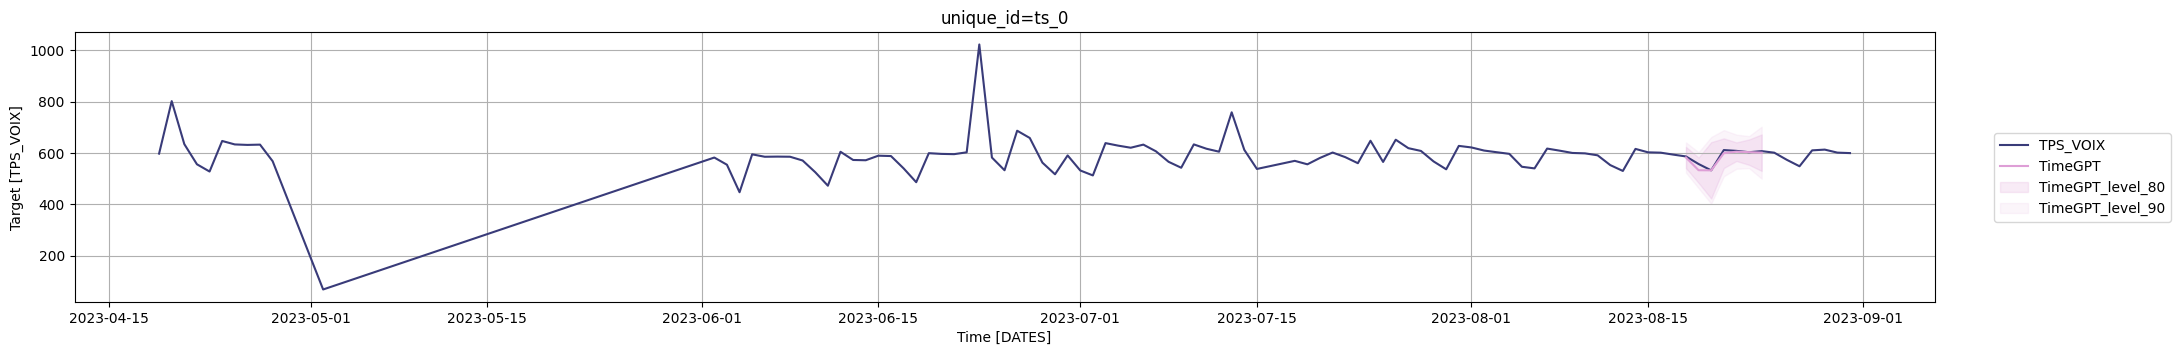

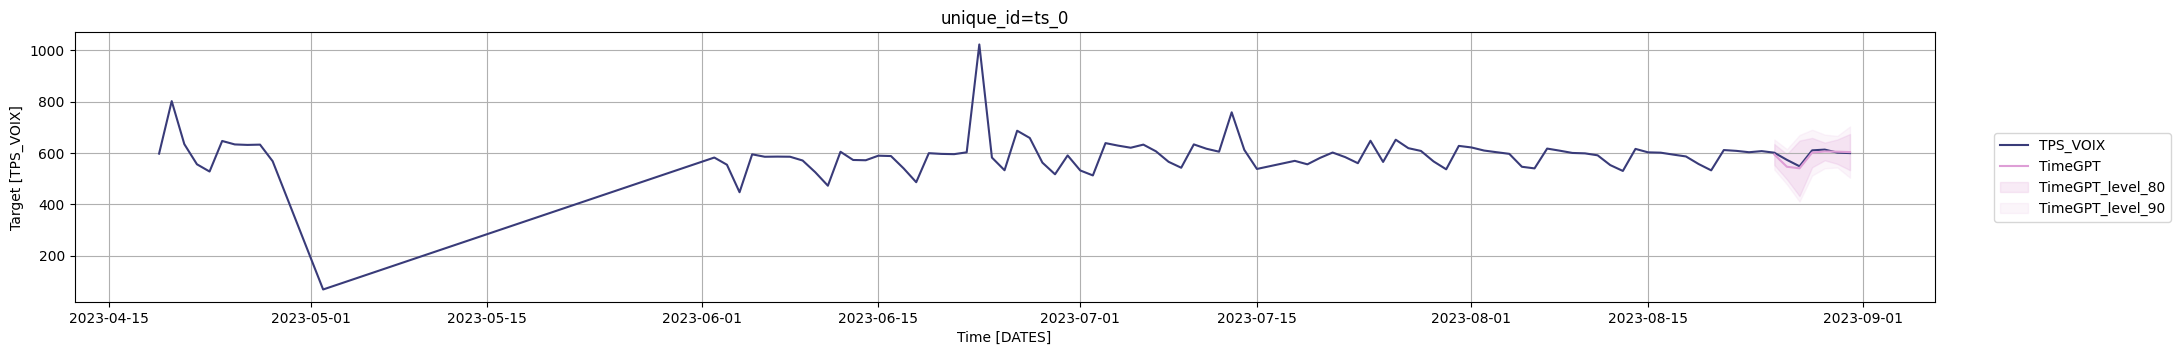

In [14]:
cutoffs = timegpt_cv_df['cutoff'].unique()
for cutoff in cutoffs:
    fig = timegpt.plot(
        voix.tail(100),
        timegpt_cv_df.query('cutoff == @cutoff').drop(columns=['cutoff', 'TPS_VOIX']),
        time_col='DATES',
        target_col='TPS_VOIX',
        level=[80, 90],
        models=['TimeGPT']
    )
    display(fig)

In [15]:
timegpt_fcst_df = timegpt.forecast(df=voix, h=200, level = [80,90] , freq='D', time_col='DATES', target_col='TPS_VOIX',finetune_steps = 20,clean_ex_first = True)
timegpt_fcst_df

,DATES,TimeGPT,TimeGPT-lo-90,TimeGPT-lo-80,TimeGPT-hi-80,TimeGPT-hi-90
0,2023-09-01,597.968811,539.951724,557.727413,638.210209,655.985898
1,2023-09-02,553.796936,486.653843,504.881121,602.712751,620.940029
2,2023-09-03,544.322327,414.718700,437.867854,650.776799,673.925953
3,2023-09-04,608.003296,519.576806,551.461036,664.545556,696.429785
4,2023-09-05,607.144531,542.475648,574.535117,639.753945,671.813415
...,...,...,...,...,...,...
195,2024-03-14,588.576416,490.136317,518.600680,658.552152,687.016516
196,2024-03-15,588.352966,530.335879,548.111569,628.594364,646.370054
197,2024-03-16,565.335510,498.192417,516.419695,614.251326,632.478604
198,2024-03-17,563.274170,433.670543,456.819697,669.728643,692.877797


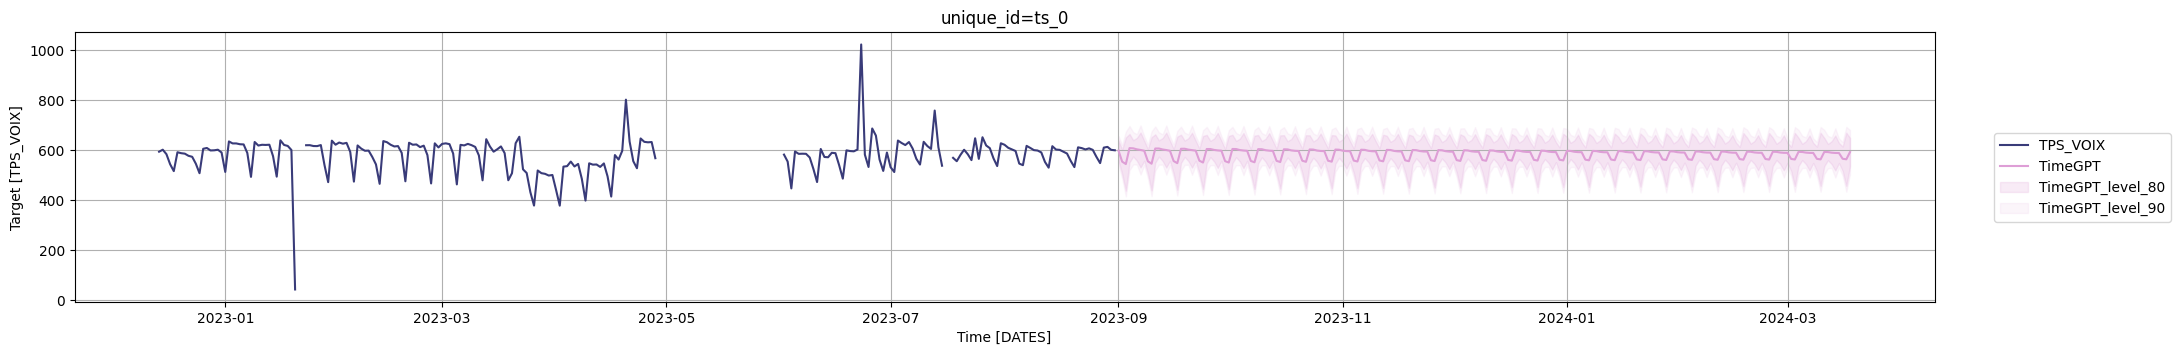

In [16]:
timegpt.plot(df, timegpt_fcst_df, time_col='DATES', target_col='TPS_VOIX',level = [80,90] )

In [17]:
dg = pd.read_excel('/content/CAPS.xlsx')
dg.dropna(inplace= True)
dg.rename(columns={'Date':'DATES'},inplace = True)
actual_values = dg['Voix']
dg

,DATES,Voix
0,2023-09-01,606.16
1,2023-09-02,559.16
2,2023-09-03,524.76
3,2023-09-04,621.04
4,2023-09-05,606.30
...,...,...
118,2023-12-28,587.92
119,2023-12-29,591.45
120,2023-12-30,553.75
121,2023-12-31,531.87


In [18]:
predictions = timegpt_fcst_df.loc[timegpt_fcst_df['DATES']<= '2024-01-01']
#predictions = timegpt_fcst_df.loc[timegpt_fcst_df['DATES'] in ['2023-12-08','2023-12-09','2023-12-10','2023-12-11','2023-12-12','2023-12-13','2023-12-14']]
selected_dates = ['2023-12-08', '2023-12-09', '2023-12-10', '2023-12-11', '2023-12-12', '2023-12-13','2023-11-01','2023-11-02']
predictions = timegpt_fcst_df[~timegpt_fcst_df['DATES'].isin(selected_dates)]
predictions = predictions.loc[predictions['DATES']<= '2024-01-01']
predictions

,DATES,TimeGPT,TimeGPT-lo-90,TimeGPT-lo-80,TimeGPT-hi-80,TimeGPT-hi-90
0,2023-09-01,597.968811,539.951724,557.727413,638.210209,655.985898
1,2023-09-02,553.796936,486.653843,504.881121,602.712751,620.940029
2,2023-09-03,544.322327,414.718700,437.867854,650.776799,673.925953
3,2023-09-04,608.003296,519.576806,551.461036,664.545556,696.429785
4,2023-09-05,607.144531,542.475648,574.535117,639.753945,671.813415
...,...,...,...,...,...,...
118,2023-12-28,592.346069,493.905970,522.370333,662.321805,690.786169
119,2023-12-29,592.059082,534.041995,551.817684,632.300480,650.076169
120,2023-12-30,561.537415,494.394321,512.621599,610.453230,628.680508
121,2023-12-31,558.763245,429.159618,452.308772,665.217717,688.366871


In [19]:
predictions = predictions['TimeGPT']
predictions

0      597.968811
1      553.796936
2      544.322327
3      608.003296
4      607.144531
          ...    
118    592.346069
119    592.059082
120    561.537415
121    558.763245
122    597.108643
Name: TimeGPT, Length: 115, dtype: float64

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(actual_values, predictions)
mse = mean_squared_error(actual_values, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 35.25741682235054
Mean Squared Error (MSE): 9208.299871466485
Root Mean Squared Error (RMSE): 95.95988678331423
